- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [3]:
!python -m pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df1 = pd.read_csv('../../csv/gpt/csv_gpt3-1.csv')
df2 = pd.read_csv('../../csv/human/csv_human-1.csv')

#### Show Top 5 Records

In [ ]:
df1.head()

#### Shape of the dataset

In [3]:
df1.shape
df2.shape

(143, 40)

In [8]:
df1.isna().sum()
df2.isna().sum()

essay                                    0
topic                                    0
para_count                               0
word_count                               0
sentence_count                           0
sentence_len(mean)                       0
sentence_len(mode)                       0
sentence_len(max)                        0
sentence_len(min)                        0
stop_words                               0
sw_rates                                 0
unique_words                             0
noun                                     0
verb                                     0
adj                                      0
pron                                     0
modal verb                               0
most_freq                                0
number_of_repeatation                    0
max_occurance_of_most_frequent_phrase    0
avg sentence complexity                  0
lexical diversity                        0
sentence similarity mean                 0
sentence si

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [4]:
df1.duplicated().sum()
df2.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [5]:
# Check Null and Dtypes
#df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   essay                                  143 non-null    object 
 1   topic                                  143 non-null    object 
 2   para_count                             143 non-null    float64
 3   word_count                             143 non-null    float64
 4   sentence_count                         143 non-null    float64
 5   sentence_len(mean)                     143 non-null    float64
 6   sentence_len(mode)                     143 non-null    float64
 7   sentence_len(max)                      143 non-null    float64
 8   sentence_len(min)                      143 non-null    float64
 9   stop_words                             143 non-null    float64
 10  sw_rates                               143 non-null    float64
 11  unique

### 3.4 Checking the number of unique values of each column

In [7]:
df2.nunique()

essay                                    141
topic                                    143
para_count                                 5
word_count                                98
sentence_count                            23
sentence_len(mean)                       130
sentence_len(mode)                        30
sentence_len(max)                         37
sentence_len(min)                         17
stop_words                                86
sw_rates                                 128
unique_words                              80
noun                                     141
verb                                     138
adj                                      136
pron                                     134
modal verb                                19
most_freq                                 18
number_of_repeatation                      9
max_occurance_of_most_frequent_phrase      4
avg sentence complexity                  106
lexical diversity                        139
sentence s

### 3.5 Check statistics of data set

In [10]:
df1.describe()

,para_count,word_count,sentence_count,sentence_len(mean),sentence_len(mode),sentence_len(max),sentence_len(min),stop_words,sw_rates,unique_words,...,flesch grade,Automated Readability,coleman_liau,cohesion score,uniqueness of words,positive_sentiment,negative_sentiment,neutral_sentiment,discourse_marker,label
count,131.000000,131.00000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,...,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0
mean,5.854962,402.00000,20.419847,19.851527,18.824427,32.007634,9.977099,183.725191,9.105043,213.183206,...,13.289313,15.496183,15.169237,4.171524,0.448110,0.170702,0.062412,0.766878,58.847328,1.0
std,0.805005,51.00739,3.147537,1.977506,4.679712,4.601833,2.457221,24.896417,1.290558,29.243224,...,1.471747,1.565759,1.781532,0.245464,0.032757,0.062315,0.052363,0.064008,10.414837,0.0
min,4.000000,196.00000,12.000000,16.066667,1.000000,24.000000,1.000000,73.000000,5.740741,113.000000,...,9.400000,11.600000,11.200000,3.475164,0.364764,0.044000,0.000000,0.593000,24.000000,1.0
25%,5.000000,366.00000,18.000000,18.444664,16.000000,29.000000,9.000000,170.000000,8.040000,190.500000,...,12.200000,14.400000,14.040000,4.012681,0.426757,0.130000,0.026500,0.733500,52.500000,1.0
50%,6.000000,398.00000,20.000000,19.782609,19.000000,31.000000,10.000000,181.000000,9.150000,214.000000,...,13.300000,15.400000,14.910000,4.154924,0.450928,0.166000,0.049000,0.775000,58.000000,1.0
75%,6.000000,437.00000,23.000000,21.216374,22.000000,35.000000,12.000000,200.500000,9.975000,232.500000,...,14.250000,16.600000,16.355000,4.357196,0.465890,0.211000,0.081500,0.809000,64.000000,1.0
max,8.000000,547.00000,30.000000,25.166667,32.000000,48.000000,15.000000,241.000000,12.050000,285.000000,...,17.900000,19.300000,21.520000,4.692394,0.538922,0.394000,0.327000,0.918000,97.000000,1.0


In [17]:
df2.describe()

,para_count,word_count,sentence_count,sentence_len(mean),sentence_len(mode),sentence_len(max),sentence_len(min),stop_words,sw_rates,unique_words,...,flesch grade,Automated Readability,coleman_liau,cohesion score,uniqueness of words,positive_sentiment,negative_sentiment,neutral_sentiment,discourse_marker,label
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0
mean,4.531532,332.054054,16.945946,20.453294,18.549550,37.297297,9.477477,174.405405,10.731202,194.270270,...,11.284685,13.267568,12.222883,4.221466,0.515010,0.132171,0.072306,0.795414,45.729730,0.0
std,0.861498,101.033553,6.770038,4.035703,6.337104,10.682692,3.074372,59.683008,2.499674,43.876054,...,2.152385,2.418909,1.742292,0.274345,0.049645,0.048049,0.056529,0.061509,12.323625,0.0
min,4.000000,226.000000,8.000000,11.041667,8.000000,20.000000,1.000000,106.000000,4.916667,123.000000,...,7.000000,7.800000,8.420000,3.223874,0.363296,0.038000,0.000000,0.583000,16.000000,0.0
25%,4.000000,276.500000,13.000000,17.642415,14.000000,31.000000,7.000000,143.000000,9.025000,168.500000,...,9.900000,11.450000,11.080000,4.038858,0.488286,0.100000,0.033000,0.760500,38.000000,0.0
50%,4.000000,311.000000,15.000000,20.785714,17.000000,37.000000,9.000000,162.000000,10.692308,185.000000,...,11.400000,13.000000,11.830000,4.203117,0.520408,0.128000,0.053000,0.791000,46.000000,0.0
75%,5.000000,353.500000,18.000000,22.500000,22.000000,42.000000,11.000000,182.000000,12.169048,206.500000,...,12.700000,14.900000,13.260000,4.400354,0.546254,0.161500,0.098000,0.841000,50.000000,0.0
max,11.000000,1029.000000,63.000000,32.636364,41.000000,88.000000,18.000000,558.000000,18.818182,489.000000,...,16.100000,19.300000,17.290000,4.908410,0.629508,0.247000,0.299000,0.928000,95.000000,0.0


### 3.7 Exploring Data

In [ ]:
df1.head()

In [19]:
print("Categories in paragraphs     ",end=" " )
print(df1['para_count'].unique())

print("Categories in 'word count:  ",end=" ")
print(df1['word_count'].unique())
'''
print("Categories in'parental level of education' variable:",end=" " )
print(df1['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())
'''

Categories in paragraphs      [6. 5. 7. 8. 4.]
Categories in 'word count:   [360. 444. 457. 419. 426. 442. 453. 441. 333. 375. 355. 330. 362. 373.
 358. 366. 464. 459. 401. 436. 398. 352. 438. 356. 353. 350. 364. 320.
 340. 346. 386. 381. 407. 349. 345. 404. 428. 365. 402. 406. 410. 460.
 427. 390. 391. 338. 389. 295. 329. 370. 403. 503. 359. 196. 397. 319.
 367. 431. 311. 482. 452. 471. 395. 394. 392. 424. 382. 387. 388. 416.
 462. 476. 477. 432. 446. 455. 498. 405. 470. 425.]


'\nprint("Categories in\'parental level of education\' variable:",end=" " )\nprint(df1[\'parental_level_of_education\'].unique())\n\nprint("Categories in \'lunch\' variable:     ",end=" " )\nprint(df[\'lunch\'].unique())\n\nprint("Categories in \'test preparation course\' variable:     ",end=" " )\nprint(df[\'test_preparation_course\'].unique())\n'

In [20]:
# define numerical & categorical columns
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 38 numerical features : ['para_count', 'word_count', 'sentence_count', 'sentence_len(mean)', 'sentence_len(mode)', 'sentence_len(max)', 'sentence_len(min)', 'stop_words', 'sw_rates', 'unique_words', 'noun', 'verb', 'adj', 'pron', 'modal verb', 'most_freq', 'number_of_repeatation', 'max_occurance_of_most_frequent_phrase', 'avg sentence complexity', 'lexical diversity', 'sentence similarity mean', 'sentence similarity median', 'sentence similarity mode', 'word_sim_p_count', 'word_sim_p_score', 'word_sim_n_count', 'word_sim_n_score', 'word_sim_score', 'flesch grade', 'Automated Readability', 'coleman_liau', 'cohesion score', 'uniqueness of words', 'positive_sentiment', 'negative_sentiment', 'neutral_sentiment', 'discourse_marker', 'label']

We have 2 categorical features : ['essay', 'topic']


In [22]:
df1.head(2)

,essay,topic,para_count,word_count,sentence_count,sentence_len(mean),sentence_len(mode),sentence_len(max),sentence_len(min),stop_words,...,flesch grade,Automated Readability,coleman_liau,cohesion score,uniqueness of words,positive_sentiment,negative_sentiment,neutral_sentiment,discourse_marker,label
0,Traffic congestion is a pressing issue in urba...,Alternative forms of transport to alleviate tr...,6.0,360.0,20.0,18.000000,19.0,26.0,11.0,157.0,...,11.5,13.9,14.09,3.990259,0.412346,0.212,0.014,0.774,39.0,1.0
1,There has been an ongoing debate on whether gi...,Giving aid to poorer countries has more negati...,6.0,444.0,21.0,21.142857,27.0,37.0,12.0,222.0,...,12.7,14.4,13.05,4.111594,0.417339,0.157,0.151,0.691,56.0,1.0


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

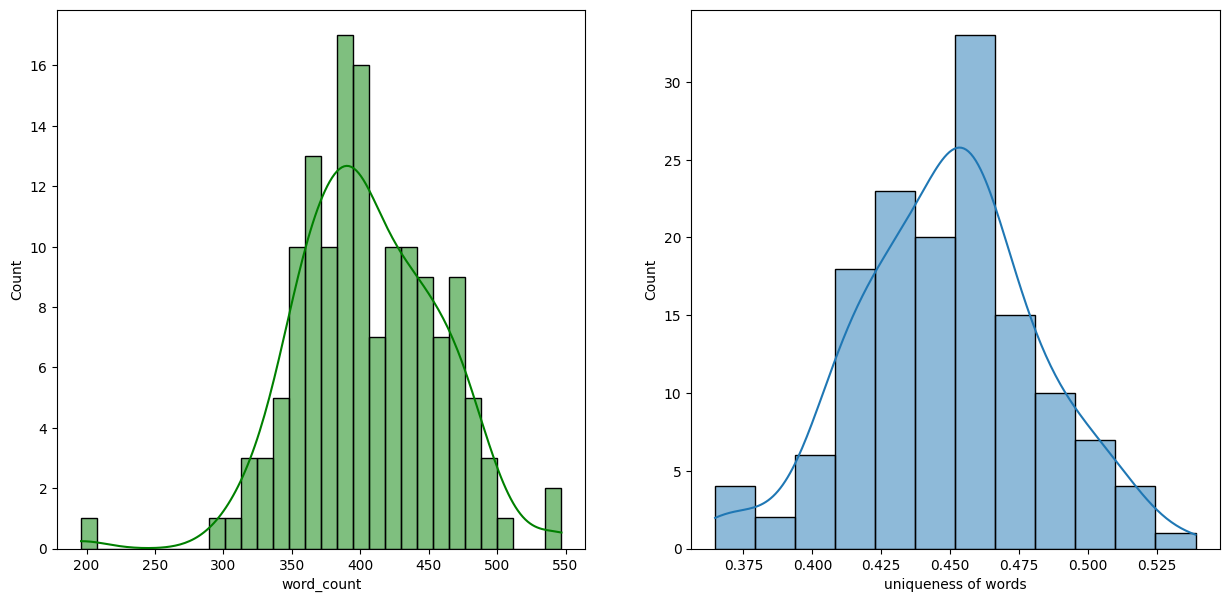

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='word_count',bins=30,kde=True,color='g')
plt.subplot(122)
#sns.histplot(data=df1,x='uniqueness of words',kde=True,hue='para_count')
sns.histplot(data=df1,x='uniqueness of words',kde=True)
plt.show()

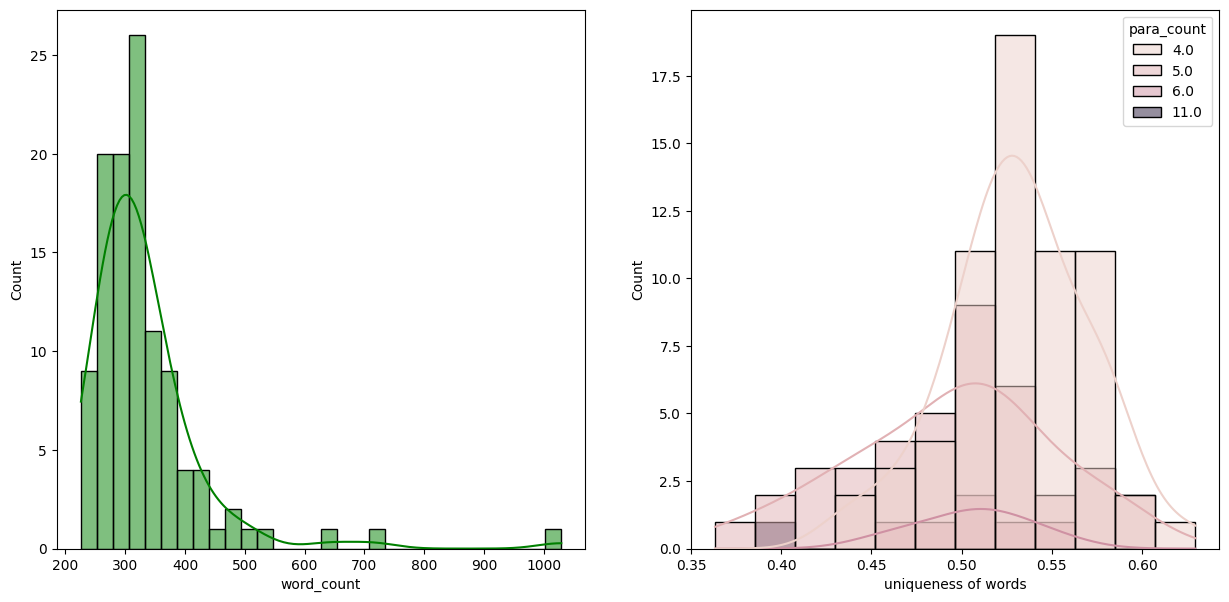

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df2,x='word_count',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df2,x='uniqueness of words',kde=True,hue='para_count')
plt.show()

<AxesSubplot: xlabel='para_count', ylabel='stop_words'>

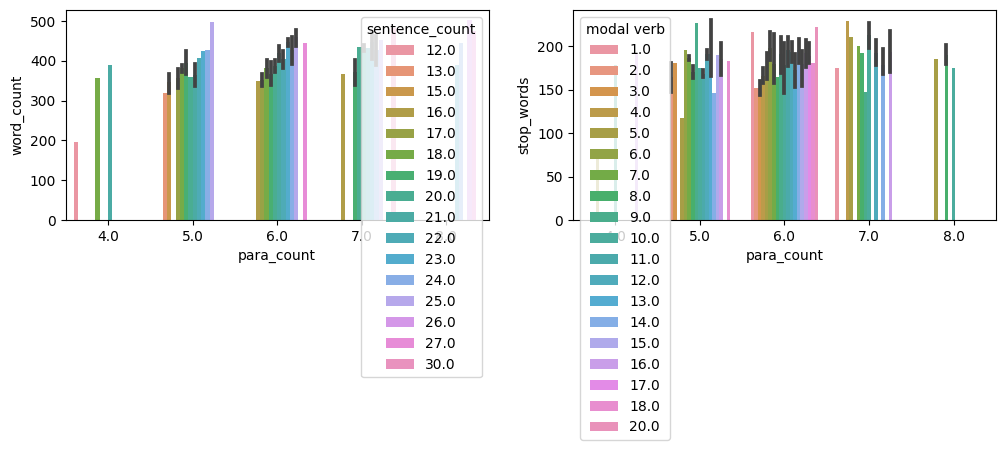

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df1['para_count'], y=df1['word_count'], hue=df1['sentence_count'])
plt.subplot(2,2,2)
sns.barplot (x=df1['para_count'], y=df1['stop_words'], hue=df1['modal verb'])
#plt.subplot(2,2,3)
#sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### 4.4.6 CHECKING OUTLIERS

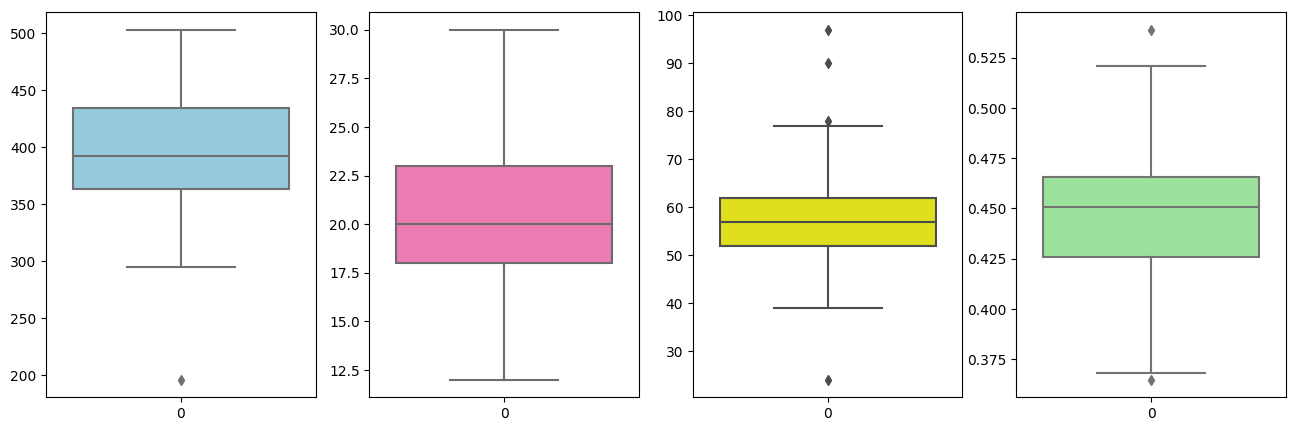

In [37]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df1['word_count'],color='skyblue')
plt.subplot(142)
sns.boxplot(df1['sentence_count'],color='hotpink')
plt.subplot(143)
sns.boxplot(df1['discourse_marker'],color='yellow')
plt.subplot(144)
sns.boxplot(df1['uniqueness of words'],color='lightgreen')
plt.show()

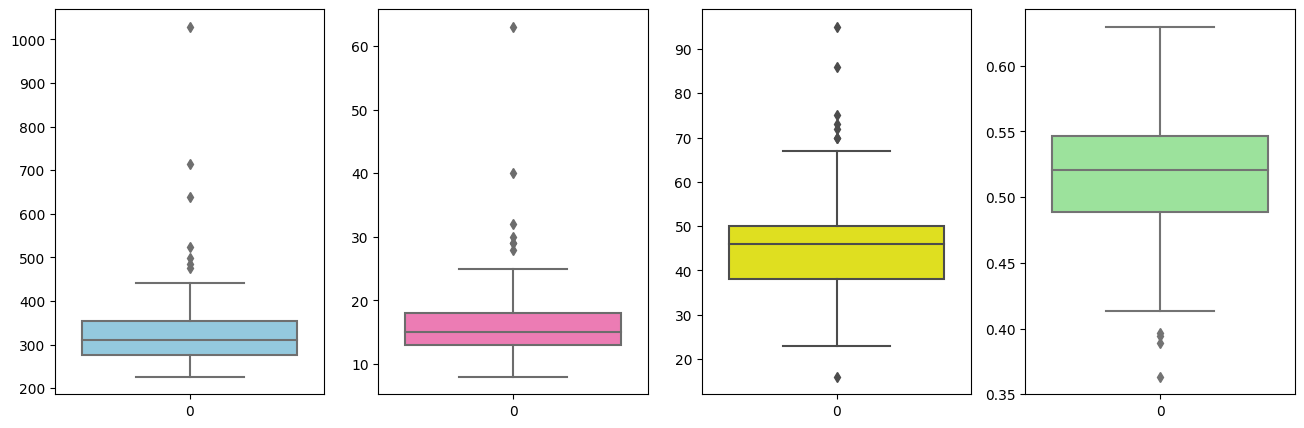

In [38]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df2['word_count'],color='skyblue')
plt.subplot(142)
sns.boxplot(df2['sentence_count'],color='hotpink')
plt.subplot(143)
sns.boxplot(df2['discourse_marker'],color='yellow')
plt.subplot(144)
sns.boxplot(df2['uniqueness of words'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

In [ ]:
sns.pairplot(df1,hue = 'para_count')
plt.show()